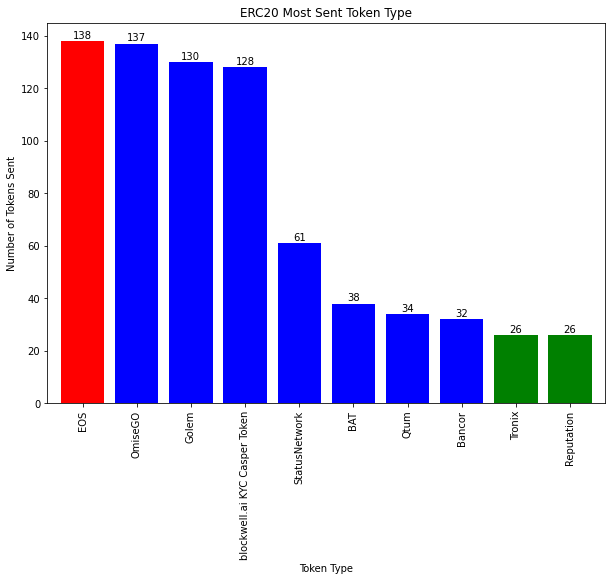

In [77]:
# Import necessary Python packages
import pandas as pd
import matplotlib.pyplot as plt

# Load csv data into a pandas dataframe
data = pd.read_csv("transaction_dataset.csv")

# Trim leading whitespace from values in column 50
data[" ERC20 most sent token type"] = data[" ERC20 most sent token type"].str.lstrip()

# Exclude "None" and "0" and NA values from bar chart
counts = data[" ERC20 most sent token type"].value_counts()
counts = counts[~counts.index.isin(['None', '0',''])]

# Show top 10 counts in bar chart
top_counts = counts[:10]

# Adjusting size of chart
plt.figure(figsize=(10,7))

# Remove non-integer values from the series top_counts
data_numeric = pd.to_numeric(top_counts, errors='coerce')
data_numeric = data_numeric.dropna()

# Find the maximum value in top_counts series
max_value = data_numeric.max()

# Find the maximum value in top_counts series
min_value = data_numeric.min()

# Highlighting highest and lowest count in bar chart
col = []
for val in top_counts:
    if val == max_value:
        col.append('red')
    elif val == min_value:
        col.append('green')
    else:
        col.append('blue')

# Create bar chart
bars = top_counts.plot(kind='bar',width = 0.8, color = col)

# Set the x-axis label to be horizontal
plt.xticks(rotation=90)

# Labelling x-axis and y-axis
plt.xlabel("Token Type")
plt.ylabel("Number of Tokens Sent")

# Adding pandas series value on top of each bar
for i, v in enumerate(top_counts):
    plt.text(i, v + 1, str(v), ha='center')

# Adding title
plt.title ("ERC20 Most Sent Token Type")

# Display the chart
plt.show()

